### Fingerprints: Ridge enhancement

In [2]:
import numpy as np
from numpy.fft import fft2, fftshift, ifft2,ifftshift
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from scipy.signal import convolve2d

(295, 315)


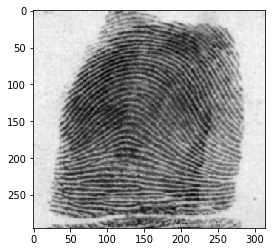

In [3]:
fingerprint = mpimg.imread('hehe.bmp',0)
fingerprint = fingerprint[:,:,0]
plt.imshow(fingerprint, cmap = 'gray')
print(fingerprint.shape)

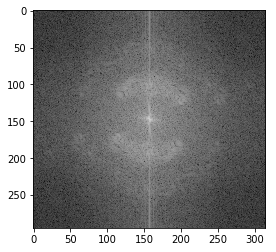

In [4]:
f_shift =fftshift(fft2(fingerprint))
lnS = np.log(f_shift)
plt.imshow(abs(lnS),cmap='gray')

### Checking through inverse fourier transform

(295, 315)


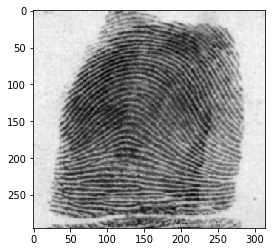

In [5]:
plt.imshow(abs(ifft2(fftshift(np.exp(lnS)))),cmap='gray')
print(lnS.shape)

### Constructing filters to be used for ridge enhancement

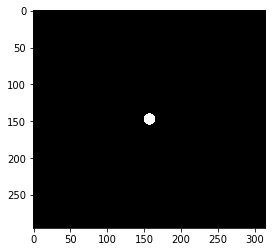

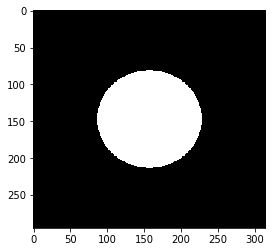

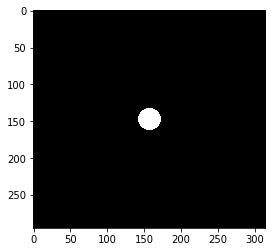

In [70]:
x1 = np.linspace(-1,1,295)
y2 = np.linspace(-1,1,315)
X2,Y2 = np.meshgrid(y2,x1)
f1 = np.where((X2)**2 + (Y2)**2 < 0.05**2,1,0)
f2 = np.where((X2)**2 + (Y2)**2 < 0.45**2,1,0)
f3 = np.where((X2)**2 + (Y2)**2 < 0.10**2,1,0)
plt.imshow(f1,cmap='gray')
plt.show()
plt.imshow(f2,cmap='gray')
plt.show()
plt.imshow(f3,cmap='gray')

In [71]:
fn = np.add(f1,np.invert(f3))

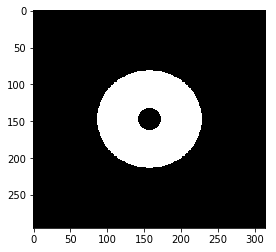

In [72]:
plt.imshow(np.subtract(fi,f3),cmap='gray')

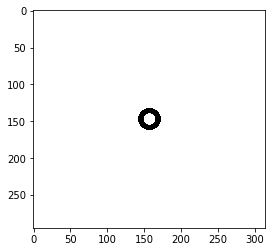

In [73]:
plt.imshow(np.subtract(f1,f3),cmap='gray')

In [74]:
filt = np.add(np.subtract(f1,f3),f2)

### Ridge enhancement of the raw fingerprint

In [90]:
m2 = np.multiply(filt,lnS)

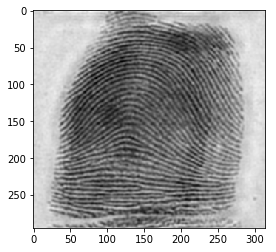

In [76]:
#plt.imshow(abs((ifft2(np.exp(m2)))),cmap='gray')

m2_f = abs((ifft2(np.exp(m2))))
plt.imshow(m2_f , cmap = 'gray')

### Convolved image of the ridge-enhanced fingerprint with the spot matrix

In [86]:
spot = np.array([[-1, -1, -1],
              [-1, 10, -1],
              [-1, -1, -1]])

In [87]:
def conv2(x, y, mode = 'same'):
    return np.rot90(convolve2d(np.rot90(x, 2), np.rot90(y, 2), mode=mode), 2)

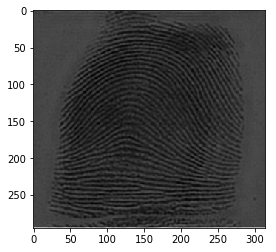

In [88]:
FSpot = abs(conv2(m2_f,spot))
plt.imshow(FSpot, cmap = 'gray')